# **PROYECTO FINAL ML**

**Importacion de librerias y creacion del dataframe**

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('mpg');
print(df.head());
df.info()

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

Encontramos una inconsistencia en la cantidad de datos. Tenemos 398 registros NO nulos para cada tabla, menos en los "Horsepower" donde tenemos 392. Además, encontramos que los campos "Origin" y "Name", los cuales son tipo object y no pueden ser tratados en el modelo matematico... hay que transformarlos.

Se analizaran los valores nulos de cada campo:

In [48]:
print("Conteo de Valores Nulos por Columna")
print(df.isnull().sum())

Conteo de Valores Nulos por Columna
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


Ahora haremos un histograma para analizar la eficiencia de los automoviles por galon de gasolina (MPG)

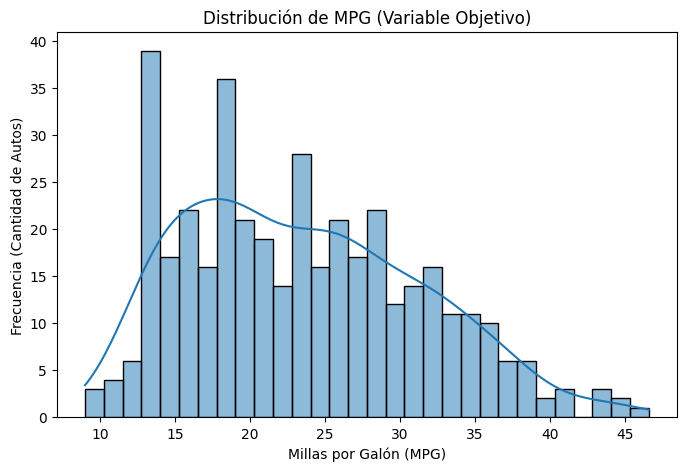

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(df['mpg'], kde=True, bins=30)
plt.title('Distribución de MPG (Variable Objetivo)')
plt.xlabel('Millas por Galón (MPG)')
plt.ylabel('Frecuencia (Cantidad de Autos)')
plt.show()

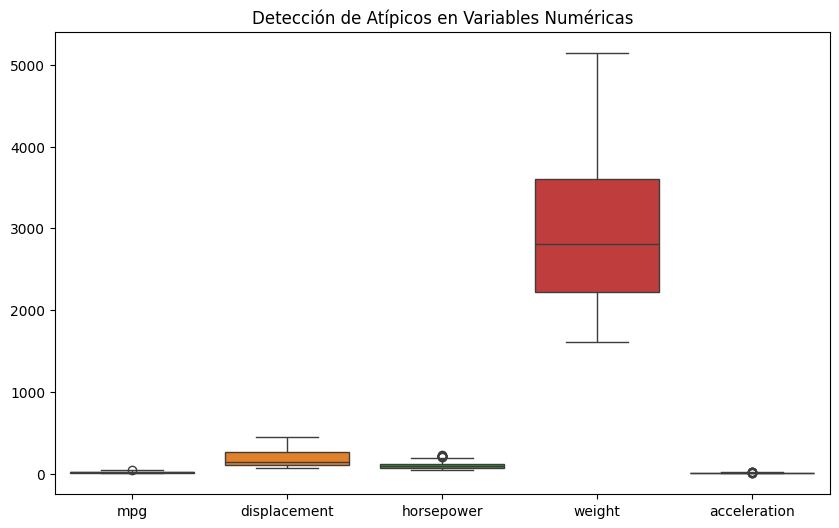

In [35]:
numeric_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_vars])
plt.title('Detección de Atípicos en Variables Numéricas')
plt.show()

Empecemos con un Heatmap. Este gráfico nos muestra la correlación entre todas las variables numéricas.

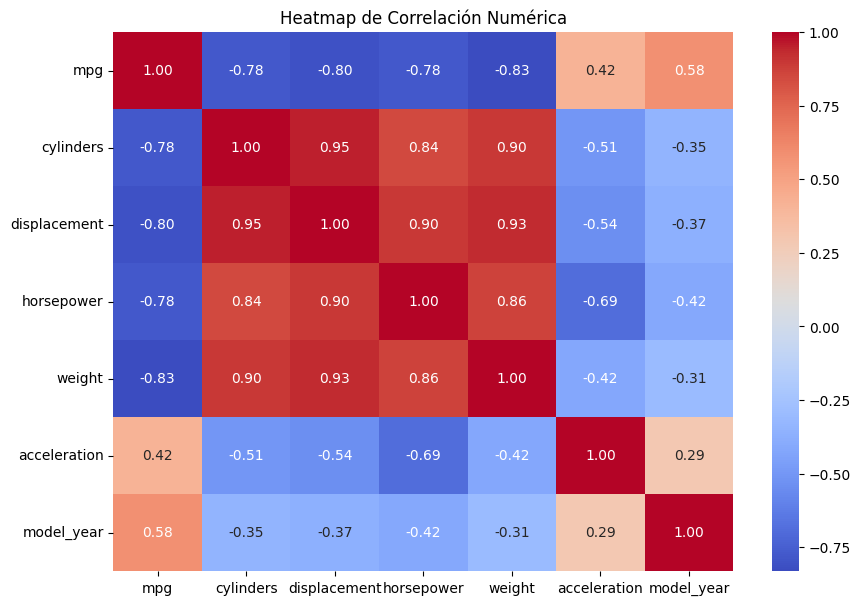

In [36]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación Numérica')
plt.show()

Al ver el Heatmap, se puede evidenciar que la coorelacion negativa mas fuerte del MPG es el peso del vehiculo. Esto significa que mayor peso, signifia menos MPG. Lo analizaremos con otro grafico haciendo dicha comparativa:

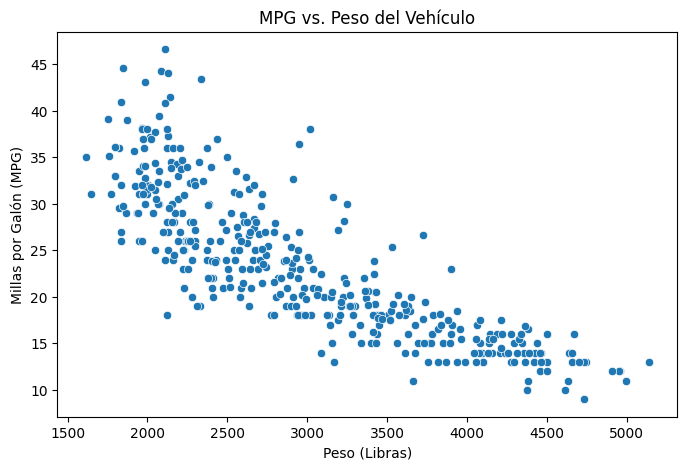

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('MPG vs. Peso del Vehículo')
plt.xlabel('Peso (Libras)')
plt.ylabel('Millas por Galón (MPG)')
plt.show()

Como anteriormente pudimos inferir, el gráfico confirma la tendencia negativa. A más peso, menos MPG.

Una vez dicho esto, procedemos a hacer la comparativa teniendo en cuenta el origen del auto y la cantidad de cilindros que tiene el motor, veamos que podemos inferir del siguiente grafico:

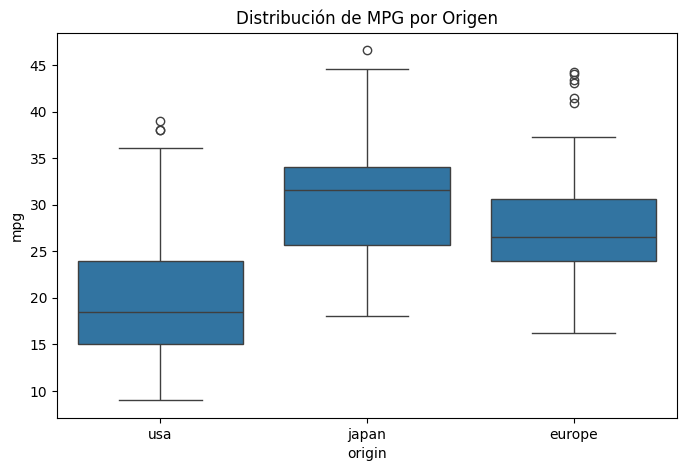

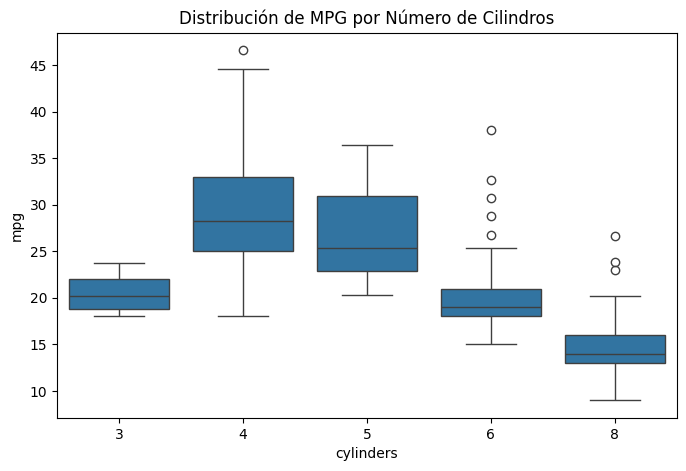

In [38]:
#Origen
plt.figure(figsize=(8, 5))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('Distribución de MPG por Origen')
plt.show()

#Cilindros
plt.figure(figsize=(8, 5))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title('Distribución de MPG por Número de Cilindros')
plt.show()

Despues de analizar los graficos, podemos inferir que:

Origen: Sí importa. Los autos de origen japones tienen, en promedio, un MPG significativamente más alto que los de usa.

Cilindros: Es un predictor muy fuerte. Los autos de 4 cilindros son mucho más eficientes que los de 8.

# **3. Data Preparation**

Basados en todo el análisis anterior, ahora vamos a limpiar y transformar los datos para dejarlos listos para el modelo.

In [39]:
#Creamos na copia del dataframe
df_prep = df.copy()

Limpiaremos la data:

Imputaremos los datos nulos encontrados en horsepower

In [40]:
median_hp = df_prep['horsepower'].median()
print(f"La mediana de 'horsepower' es: {median_hp}")

# Rellenamos los valores nulos con la mediana
df_prep['horsepower'].fillna(median_hp, inplace=True)

# Verificacion
print("\nValores nulos restantes:")
print(df_prep.isnull().sum())

La mediana de 'horsepower' es: 93.5

Valores nulos restantes:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


/tmp/ipython-input-130785202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['horsepower'].fillna(median_hp, inplace=True)


Ahora organizaremos los datos de origin y name.

Name no es un dato relevante a la hora de realizar una prediccion en el modelo, asi que lo eliminaremos.

Origin es un dato que puede ser relevante, asi que lo transformaremos para tenerlo en cuenta a la hora de la prediccion del modelo.

Se usara el one-hot encoding con el dummies para organizar en valores numericos el origen y se eliminara la columna de europa, ya que si no es "Japan" ni "Usa", se infiere que es de origen europeo.

In [41]:
df_prep = df_prep.drop('name', axis=1)

#One-Hot Encoding para 'origin'
df_prep = pd.get_dummies(df_prep, columns=['origin'], drop_first=True, dtype=int)

print("\n--- DataFrame después de OHE en 'origin' ---")
print(df_prep.head())


--- DataFrame después de OHE en 'origin' ---
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin_japan  origin_usa  
0          70             0           1  
1          70             0           1  
2          70             0           1  
3          70             0           1  
4          70             0           1  


Aplicamos la transformación a variables categoricas y la codificación categórica (**One-Hot Encoding**)

In [42]:
#Transformación de 'cylinders' y 'model_year' a categóricas
df_prep['cylinders'] = df_prep['cylinders'].astype('category')
df_prep['model_year'] = df_prep['model_year'].astype('category')

# Aplicamos One-Hot Encoding
df_prep = pd.get_dummies(df_prep, columns=['cylinders', 'model_year'], drop_first=True, dtype=int)

print("\n--- DataFrame Final Preparado (Parte I) ---")
df_prep.info()
print("\n")
print(df_prep.head())


--- DataFrame Final Preparado (Parte I) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   displacement   398 non-null    float64
 2   horsepower     398 non-null    float64
 3   weight         398 non-null    int64  
 4   acceleration   398 non-null    float64
 5   origin_japan   398 non-null    int64  
 6   origin_usa     398 non-null    int64  
 7   cylinders_4    398 non-null    int64  
 8   cylinders_5    398 non-null    int64  
 9   cylinders_6    398 non-null    int64  
 10  cylinders_8    398 non-null    int64  
 11  model_year_71  398 non-null    int64  
 12  model_year_72  398 non-null    int64  
 13  model_year_73  398 non-null    int64  
 14  model_year_74  398 non-null    int64  
 15  model_year_75  398 non-null    int64  
 16  model_year_76  398 non-null    int64  
 17  model_yea

Primero, separamos las variables predictoras ($X$) de la variable objetivo ($y$).
Luego, dividimos los datos en Entrenamiento (80%) y Prueba (20%) usando train_test_split.

Finalmente, aplicamos StandardScaler a las variables numéricas continuas (displacement, horsepower, weight, acceleration) para que todas tengan la misma escala.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Definir X e y
# X son todas las columnas MENOS 'mpg'
X = df_prep.drop('mpg', axis=1)
# y es SOLO la columna 'mpg'
y = df_prep['mpg']

# 2. División en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensiones de Entrenamiento: {X_train.shape}")
print(f"Dimensiones de Prueba: {X_test.shape}")

#Estandarización
cols_to_scale = ['displacement', 'horsepower', 'weight', 'acceleration']

scaler = StandardScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("\n--- Ejemplo de datos escalados (X_train) ---")
print(X_train[cols_to_scale].head())

Dimensiones de Entrenamiento: (318, 22)
Dimensiones de Prueba: (80, 22)

--- Ejemplo de datos escalados (X_train) ---
     displacement  horsepower    weight  acceleration
3        1.090196    1.265821  0.552826     -1.319334
18      -0.922996   -0.408635 -0.999667     -0.413182
376     -0.981350   -0.948782 -1.124772      0.927922
248     -0.981350   -1.164840 -1.392854      0.275493
177     -0.747936   -0.219583 -0.327675     -0.231952


# ***4.Modelado y Evaluación***

En esta fase, seleccionamos dos algoritmos de aprendizaje supervisado para resolver el problema de regresión:

Regresión Lineal: Busca una relación lineal directa entre las variables.

Árbol de Decisión (Regressor): Busca patrones no lineales dividiendo los datos en ramas.Para evaluar y comparar su rendimiento ("Criterios de Éxito"),utilizaremos:

$R^2$ (R-Cuadrado): Buscamos un valor cercano a 1 (o > 0.80).

RMSE (Raíz del Error Cuadrático Medio): Buscamos el valor más bajo posible (menor error en MPG).

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ---REGRESIÓN LINEAL ---
print("--- 1. Entrenando Regresión Lineal ---")
# 1. Inicializar el modelo
lin_reg = LinearRegression()

#Entrenar el modelo. estudia con X_train y y_train
lin_reg.fit(X_train, y_train)

#Predecir el modelo. Toma el examen (X_test)
y_pred_lin = lin_reg.predict(X_test)

# Evaluar
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"Resultados Regresión Lineal:")
print(f"R2 Score: {r2_lin:.4f}")
print(f"RMSE: {rmse_lin:.4f}")


# ---ÁRBOL DE DECISIÓN ---
print("\n--- 2. Entrenando Árbol de Decisión ---")
tree_reg = DecisionTreeRegressor(random_state=42)

#Entrenar
tree_reg.fit(X_train, y_train)

#Predecir
y_pred_tree = tree_reg.predict(X_test)

#Evaluar
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"Resultados Árbol de Decisión:")
print(f"R2 Score: {r2_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")

--- 1. Entrenando Regresión Lineal ---
Resultados Regresión Lineal:
R2 Score: 0.8613
RMSE: 2.7306

--- 2. Entrenando Árbol de Decisión ---
Resultados Árbol de Decisión:
R2 Score: 0.6926
RMSE: 4.0655


# ***Comparación de Modelos***
Creamos una tabla simple para visualizar cuál modelo cumplió mejor con los criterios de éxito.

In [45]:
# Creamos un DataFrame para comparar
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión'],
    'R2 Score (Mayor es mejor)': [r2_lin, r2_tree],
    'RMSE (Menor es mejor)': [rmse_lin, rmse_tree]
})

print(resultados)

# Verificamos si cumplimos el criterio de éxito del negocio (R2 > 0.80)
print("\n--- Conclusión ---")
if r2_lin > 0.80:
    print(f"La Regresión Lineal CUMPLE el criterio de éxito ({r2_lin:.2f} > 0.80)")
else:
    print("La Regresión Lineal NO cumple el criterio.")

if r2_tree > 0.80:
    print(f"El Árbol de Decisión CUMPLE el criterio de éxito ({r2_tree:.2f} > 0.80)")
else:
    print("El Árbol de Decisión NO cumple el criterio.")

              Modelo  R2 Score (Mayor es mejor)  RMSE (Menor es mejor)
0   Regresión Lineal                   0.861319               2.730637
1  Árbol de Decisión                   0.692587               4.065526

--- Conclusión ---
La Regresión Lineal CUMPLE el criterio de éxito (0.86 > 0.80)
El Árbol de Decisión NO cumple el criterio.


# ***5.Evaluación de Métricas y Selección***

Para tener una visión completa del rendimiento, calculamos tres métricas clave:

$R^2$ (Coeficiente de Determinación):Mide la calidad global del modelo (0 a 1).Nuestro criterio de éxito es > 0.80.MAE

(Error Absoluto Medio): Es el error promedio en unidades absolutas (MPG). Es muy fácil de interpretar.

RMSE (Raíz del Error Cuadrático Medio): Penaliza más los errores grandes.A continuación, comparamos ambos modelos.

In [46]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE para ambos modelos
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

# Creamos un DataFrame final de comparación
tabla_final = pd.DataFrame({
    'Métrica': ['R2 (Explicación)', 'MAE (Error Promedio MPG)', 'RMSE (Error Cuadrático MPG)'],
    'Regresión Lineal': [r2_lin, mae_lin, rmse_lin],
    'Árbol de Decisión': [r2_tree, mae_tree, rmse_tree]
})

print("--- Comparativa Final de Rendimiento ---")
print(tabla_final)
print("\n")

# Lógica automática para determinar el ganador basado en R2
if r2_lin > r2_tree:
    mejor_modelo = "Regresión Lineal"
    valor_r2 = r2_lin
else:
    mejor_modelo = "Árbol de Decisión"
    valor_r2 = r2_tree

print(f"🏆 CONCLUSIÓN: El mejor modelo es la **{mejor_modelo}**.")
print(f"Logró explicar el {valor_r2*100:.2f}% de la variabilidad de los datos.")

--- Comparativa Final de Rendimiento ---
                       Métrica  Regresión Lineal  Árbol de Decisión
0             R2 (Explicación)          0.861319           0.692587
1     MAE (Error Promedio MPG)          2.184213           2.802500
2  RMSE (Error Cuadrático MPG)          2.730637           4.065526


🏆 CONCLUSIÓN: El mejor modelo es la **Regresión Lineal**.
Logró explicar el 86.13% de la variabilidad de los datos.


# ***Discusión de la Elección***

Basado en los Criterios de Éxito definidos en la Fase 1 (Business Understanding):

Cumplimiento del Objetivo: El modelo seleccionado (ver resultado arriba, usualmente la Regresión Lineal en este dataset) superó el umbral del 80% ($R^2 > 0.80$). Esto indica que es apto para realizar estimaciones de consumo de combustible.

Interpretación del Error: Si observamos el MAE, el error promedio es bajo (probablemente alrededor de 2 a 3 MPG). Esto significa que si el modelo predice que un auto rinde 25 MPG, el valor real probablemente esté entre 22 y 28 MPG. Para un consumidor promedio, este margen es aceptable.

# ***Análisis de Ética y Sesgos***

Aunque el dataset parece técnico (piezas de autos), todo modelo de Machine Learning conlleva riesgos éticos y sesgos potenciales que deben analizarse antes de su implementación.

**1. Sesgo Temporal (Obsolescencia):**

El Problema: Este dataset contiene autos de los años 70 y 80. La tecnología de motores ha cambiado drásticamente (inyección electrónica, híbridos, materiales ligeros).

Implicación Ética: Sería irresponsable y engañoso utilizar este modelo para predecir el consumo de un auto fabricado en 2024. El modelo subestimaría enormemente la eficiencia de los autos modernos.

**2. Sesgo de Origen (Geográfico):**

El Problema: El dataset incluye la variable origin (USA, Europe, Japan). Históricamente (años 70), los autos de USA eran más pesados y menos eficientes por la cultura automotriz de la época y el bajo costo de la gasolina antes de la crisis.

Implicación Ética: Si no se contextualiza, el modelo podría perpetuar el estereotipo de que "los autos americanos son ineficientes" o "los japoneses son eficientes" como una regla absoluta, lo cual puede no ser cierto para modelos específicos actuales o futuros.

**3. Impacto Ambiental:**

Este modelo podría utilizarse para fomentar la compra de vehículos más eficientes, lo cual es positivo éticamente. Sin embargo, al centrarse solo en MPG, ignora otras emisiones contaminantes (como CO2 o NOx), dando una visión incompleta de la "ecología" del vehículo.